In [21]:
#fake url detection
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [22]:
# import the buy using pandas

url_data = pd.read_csv('D:/AI_stuff/Assinments/Asignments/Fake URL dataset/urldataset/data.csv')

url_data.head()

,url,label
0,diaryofagameaddict.com,bad
1,espdesign.com.au,bad
2,iamagameaddict.com,bad
3,kalantzis.net,bad
4,slightlyoffcenter.net,bad


In [113]:
print(np.unique(url_data['label']))

[0 1]


In [24]:
def labelize(label):
    if label == 'bad':
        return 0;
    else:
        return 1;

url_data['label'] = url_data['label'].apply(labelize)    

In [139]:
print(np.unique(url_data['label']))

[0 1]


In [26]:
label_data = url_data['label'].value_counts()
print(label_data)

1    344821
0     75643
Name: label, dtype: int64


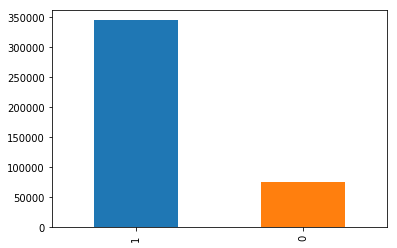

In [27]:
label_data.plot(kind = 'bar')

<h1> Observation from graph:</h1>
    
<h3> The data we have is imbalanced </h3>

In [28]:
#Check for null data
print("Null Values in Data set")
print("{}".format(url_data.isnull().sum()))

Null Values in Data set
url      0
label    0
dtype: int64


In [29]:
#printing some GOOD label urls
print(url_data[url_data['label'] == 1].head(5))

                                                     url  label
42767                                         01453.com/      1
42768              015fb31.netsolhost.com/bosstweed.html      1
42769            02bee66.netsolhost.com/lincolnhomepage/      1
42770  02ec0a3.netsolhost.com/getperson.php?personID=...      1
42771                                        032255.com/      1


In [30]:
import re
final_string = []
str1 = ""
for url in url_data['url'].values:
    
    tokensBySlash = str(url.encode('utf-8')).split('/')#Splitting tokens by slash
    allTokens = []
    for i in tokensBySlash:
        tokensByDash = str(i).split('-')
        for j in tokensByDash:
            tokenByDot = str(j).split('.')
            allTokens += tokenByDot
            allTokens = list(set(allTokens))
    if 'com' in allTokens:
        allTokens.remove('com')
    str1 = " ".join(allTokens)
    final_string.append(str1)
            
    

In [31]:
print(final_string[0])

b'diaryofagameaddict com'


In [32]:
url_data['final_url'] = final_string
url_data['final_url'] = url_data['final_url']

In [33]:
url_data_sample = url_data.sample(n=50000)

In [34]:
url_data_sample.head()

,url,label,final_url
51898,baseballballcollections.com/,1,' b'baseballballcollections
169431,2dopeboyz.com/2011/01/31/halo-heat-writer-ii-a...,1,01 heat ' writer album 31 b'2dopeboyz 2011 hal...
15564,anjans.com/merchant/Kay%20Generator%20Executab...,0,a06d5zc40ad5e6zr6fef06a40vc2be750 Ak47_ paypal...
243274,flickr.com/photos/lorenjavier/3268882368/,1,3268882368 b'flickr ' photos lorenjavier
140699,sandrafinley.ca/?p=3297,1,b'sandrafinley ?p=3297' ca


In [35]:
X = url_data_sample['final_url']
y = url_data_sample['label']

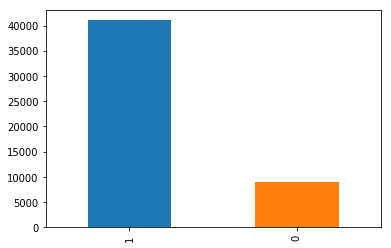

In [36]:
y.value_counts().plot(kind = 'bar')

In [37]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 1)


In [38]:
X_train,x_cv,y_train,y_cv = train_test_split(X_train,y_train,test_size = 0.3,random_state = 1)

# Apply BAG OF WORDS 

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing 

bow = CountVectorizer()

X_train = bow.fit_transform(X_train)

X_train = preprocessing.normalize(X_train)

X_cv = bow.transform(x_cv)

X_cv = preprocessing.normalize(X_cv)

X_test = bow.transform(X_test)

X_test = preprocessing.normalize(X_test)

In [40]:
# appling SMOTE on training data
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X_train,y_train = smt.fit_sample(X_train,y_train)

In [41]:
print(X_train.shape[0])
print(y_train.shape[0])

40166
40166


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
C = [0.00001,0.0001,0.001,0.01,0.1,1,0.5,10,100,1000]
penalty = ['l1','l2']
cv_scores = []
train_scores = []
j=0
for p in penalty:
    for c in C: 
        lreg = LogisticRegression(penalty = p,C =c)
        lreg.fit(X_train,y_train)
        cv_score = roc_auc_score(np.array(y_cv),lreg.predict_proba(X_cv)[:,1])
        cv_scores.append(cv_score)
        train_score = roc_auc_score(np.array(y_train),lreg.predict_proba(X_train)[:,1])
        train_scores.append(train_score)
        print("When C is {} and Penalty is {} , the Cross validation score is {} and the train score is {}".format(c,p,cv_scores[j],train_scores[j]))
        j +=1

When C is 1e-05 and Penalty is l1 , the Cross validation score is 0.5 and the train score is 0.5
When C is 0.0001 and Penalty is l1 , the Cross validation score is 0.5 and the train score is 0.5
When C is 0.001 and Penalty is l1 , the Cross validation score is 0.5 and the train score is 0.5
When C is 0.01 and Penalty is l1 , the Cross validation score is 0.7786704837500706 and the train score is 0.8147524277757736
When C is 0.1 and Penalty is l1 , the Cross validation score is 0.9244050611996323 and the train score is 0.9496497120478371
When C is 1 and Penalty is l1 , the Cross validation score is 0.9688669363336296 and the train score is 0.9940287169894095
When C is 0.5 and Penalty is l1 , the Cross validation score is 0.9608013279736248 and the train score is 0.9872520487965779
When C is 10 and Penalty is l1 , the Cross validation score is 0.9748925874119229 and the train score is 0.999999945453674
When C is 100 and Penalty is l1 , the Cross validation score is 0.9757588518628386 and

<h4> When we Roc curve as metric the best parameters are c = 1000, p = l2

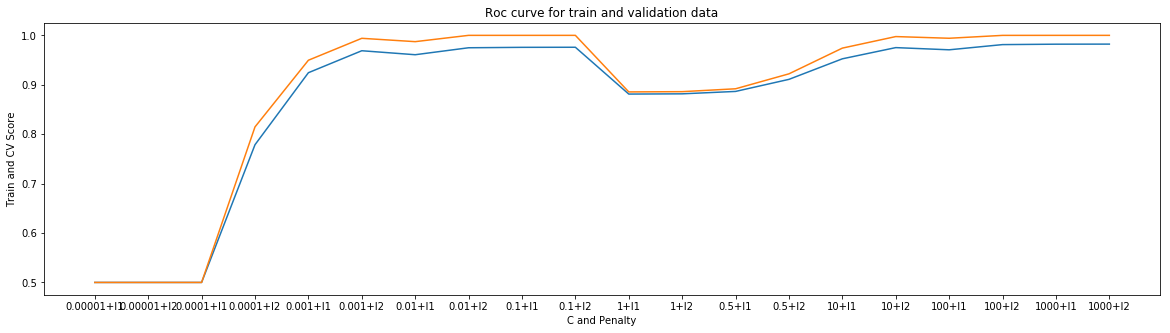

In [44]:
import matplotlib.pyplot as plt
from sklearn.metrics import auc
x_ticks = ['0.00001+l1','0.00001+l2','0.0001+l1','0.0001+l2','0.001+l1','0.001+l2','0.01+l1','0.01+l2','0.1+l1','0.1+l2','1+l1','1+l2',
           '0.5+l1','0.5+l2','10+l1','10+l2','100+l1','100+l2','1000+l1','1000+l2']
plt.figure(figsize =(20,5))
plt.title("Roc curve for train and validation data")
plt.xlabel("C and Penalty")
plt.ylabel("Train and CV Score")
plt.plot(range(len(C)*len(penalty)),cv_scores)
plt.plot(range(len(C)*len(penalty)),train_scores)
plt.xticks(range(len(C)*len(penalty)),x_ticks)
plt.show()

In [45]:
pred = lreg.predict(X_cv)

In [46]:
from sklearn.metrics import confusion_matrix
labels = ['positive','negative']
def plot_confusion_matrix(y,pred):
        cm = confusion_matrix(y,pred)
        sn.heatmap(cm,annot = True,fmt = 'd')
        plt.xlabel("predicted")
        plt.ylabel("Actual")
        plt.xticks(label = labels)
        plt.yticks(label = labels)
        plt.show()

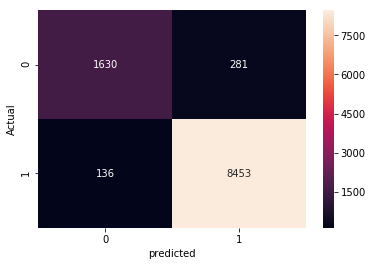

In [47]:
plot_confusion_matrix(y_cv,pred)

In [48]:
precision = 8472/(8472+317)
print(precision)

0.9639321879622255


In [49]:
recall = 8472/(8472+133)

print(recall)

0.9845438698431145


In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_cv,pred))

             precision    recall  f1-score   support

          0       0.92      0.85      0.89      1911
          1       0.97      0.98      0.98      8589

avg / total       0.96      0.96      0.96     10500



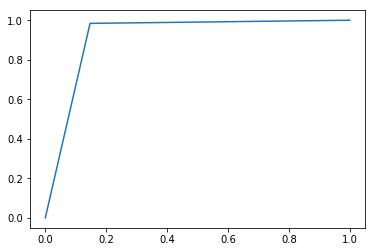

In [51]:
from sklearn.metrics import roc_curve

fpr,tpr,threshold = roc_curve(y_cv,pred)

plt.plot(fpr,tpr)
plt.show()

In [52]:
clf = LogisticRegression(C = 1000 , penalty = 'l2')
clf.fit(X_train,y_train)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [53]:
pred1 = clf.predict(X_test)

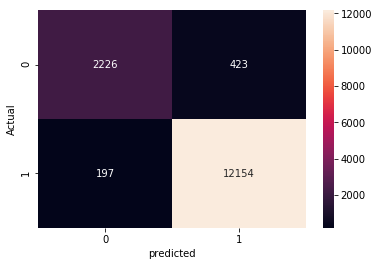

In [54]:
plot_confusion_matrix(y_test,pred1)

# Top Features of bad and good URL

In [55]:
features = pd.DataFrame(data = clf.coef_.T,index = bow.get_feature_names())

In [56]:
features.sort_values(by = 0).head(10)

,0
wp,-23.183092
exe,-22.992210
nwalreadingaides,-22.939493
login,-21.964382
nwww,-21.848607
upload,-21.577781
odiagurujan,-21.550912
1skyvideo,-21.393283
xyz,-20.888687
js,-20.617372


In [57]:
features.sort_values(by = 0,ascending = False).head(10)

,0
cracantu,18.726004
classicalsinger,16.450765
markosweb,16.360445
plproject,15.258241
scribd,14.595381
londonogroup,14.445415
photobucket,14.435966
2011,14.291188
spoke,13.672665
edu,13.398820


# Apply Decision Tree Classifier

In [149]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import datetime
n_estimators = [int(x) for x in np.linspace(start = 10,stop = 200,num = 10)]

params = {
    'n_estimators' : n_estimators
}

estimator = RandomForestClassifier()
start = datetime.datetime.now()
print(start)
model = RandomizedSearchCV(estimator = estimator,param_distributions  = params)
model.fit(X_train,y_train)
print(datetime.datetime.now() - start)

2019-04-21 22:35:57.025688
10:56:50.520291


In [151]:
print(model.best_params_)

{'n_estimators': 136}


In [153]:
randomReg = RandomForestClassifier(n_estimators = 136)
randomReg.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=136, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [155]:
pred2 = randomReg.predict(X_test)

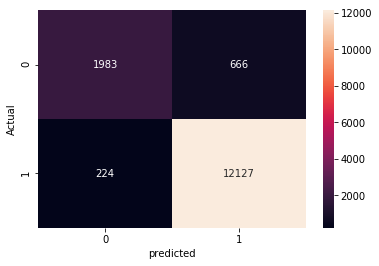

In [157]:
plot_confusion_matrix(y_test,pred2)

In [184]:
r_pred = randomReg.predict_proba(X_test)[:,1]


In [188]:
print(r_pred.shape)
print(y_test.shape)

(15000,)
(15000,)


In [186]:
r_fpr,r_tpr,thresholds = roc_curve(y_test,r_pred)

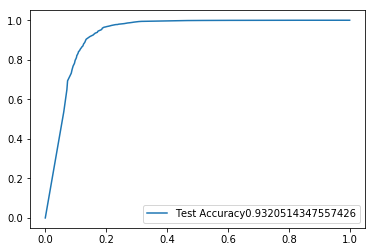

In [193]:
plt.plot(r_fpr,r_tpr,label = 'Test Accuracy'+str(auc(r_fpr,r_tpr)))
plt.legend()